In [1]:
import numpy as np
import cv2
import skimage.io as io
import math

import matplotlib.pyplot as plt


from signal_aspect_detection.signal_class import load_signal


from signal_aspect_detection import detect_lights
from signal_aspect_detection import filter_matches
from signal_aspect_detection import find_aspect




In [2]:
def test(image,model,signal_aspect):

    print("image",image)
    I = io.imread(image)

    print("model",model)
    signal_definition = load_signal(model)

    signalLights ,  lights_matches , images  = detect_lights(I,signal_definition)
    
    #dump
    for i in range(len(signalLights)):
        signalLight = signalLights[i]
        print("Light",i,signalLight.getXY(),signalLight.getExpansion(),signalLight.getColor())
        for lm in lights_matches[i]:
            print("     match",lm)

    lights_filtered = filter_matches(lights_matches,0.15,0.7,0.8)
    print("lights_filtered",lights_filtered)
    matching = find_aspect(lights_filtered,signal_definition)  
    print("matching",matching)
            
    #dump
    l = len(images)
    fig, axs = plt.subplots(nrows=1, ncols=l) 
    for i in range(l):
        axs[i].imshow(images[i])
    plt.show()

    #for img in images:
    #    plt.imshow(img)
    #    plt.show()
    
    assert signal_aspect == matching


image ../data/drohne-signals/traffic_light0009.png
model ../models/signals/kshauptsignal3.json
crop [(255, 100)] [(255, 161)]
boxes [(0, 99, 0, 160)]
crop (0, 99, 0, 160)
Light 0 (32.54533386230469, 155.64443969726562) 8.643962860107422 [('yellow', 1.0)]
     match ('l3', 0.6341991233041746, 0.5933303805230622, 0.0)
     match ('l81', 0.285419165845808, 0.008729610804900182, 0.0)
     match ('l82', 0.47468081225351083, 0.008729610804900182, 0.0)
     match ('l83', 0.19973231475661898, 0.008729610804900182, 0.0)
Light 1 (24.806760787963867, 131.7283935546875) 9.846247673034668 [('white', 0.7368421052631579), ('black', 0.2631578947368421)]
     match ('l6', 0.7033656316156506, 0.20254963682101296, 0.2631578947368421)
     match ('l7', 0.1108857846942159, 0.20254963682101296, 0.2631578947368421)
     match ('l9', 0.28281301922030366, 0.20254963682101296, 0.2631578947368421)
Light 2 (46.04743957519531, 100.62335968017578) 9.697793006896973 [('white', 0.875), ('black', 0.125)]
     match ('

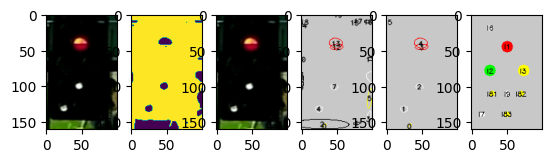

In [3]:
 test('../data/drohne-signals/traffic_light0009.png','../models/signals/kshauptsignal3.json','Hp 0+Sh 1');

image ../data/ks-signals/traffic_light0006.png
model ../models/signals/ampel.json
crop [(255, 100)] [(0, 4), (255, 208)]
boxes [(0, 99, 4, 211)]
crop (0, 99, 4, 211)
Light 0 (20.9354190826416, 159.46022033691406) 5.240425109863281 [('red', 1.0)]
     match ('l3', 0.28924711173932366, 1.4979257225123228, 0.0)
Light 1 (90.4483413696289, 153.92544555664062) 3.98616099357605 [('red', 0.9999999999999999)]
     match ('l1', 0.6439901495267805, 1.8501082406236853, 0.9999999999999999)
     match ('l2', 0.480023665620293, 1.8501082406236853, 0.9999999999999999)
     match ('l3', 0.4136691025730115, 1.8501082406236853, 0.0)
Light 2 (67.51224517822266, 131.7428436279297) 24.04696273803711 [('white', 0.7747747747747747), ('red', 0.2252252252252252)]
     match ('l3', 0.21447372143138305, 0.2938057398563981, 0.7747747747747747)
Light 3 (54.385231018066406, 132.16012573242188) 38.750213623046875 [('white', 0.7758620689655172), ('red', 0.22413793103448276)]
     match ('l3', 0.12197276624360492, 0.10

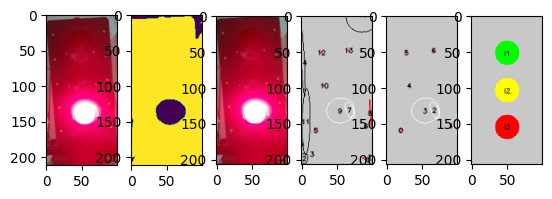

In [4]:
test('../data/ks-signals/traffic_light0006.png','../models/signals/ampel.json','red')


In [5]:
test('../data/ks-signals/traffic_light0009.png','../models/signals/ampel.json','yellow')


image ../data/ks-signals/traffic_light0009.png
model ../models/signals/ampel.json
crop [(0, 8), (255, 80), (0, 12)] [(0, 2), (255, 168)]
boxes [(8, 87, 2, 169)]
crop (8, 87, 2, 169)
Light 0 (56.666778564453125, 84.04794311523438) 6.763306140899658 [('red', 0.6190476190476191), ('black', 0.38095238095238093)]
     match ('l3', 0.3287703446936129, 1.301909515898106, 0.38095238095238093)
Light 1 (39.99187469482422, 69.50019836425781) 55.48347473144531 [('black', 0.6016194331983805), ('yellow', 0.30121457489878545), ('red', 0.09716599190283401)]
     match ('l2', 0.08406204632540094, 0.6381640373470077, 0.6987854251012146)
     match ('l3', 0.3338892052644425, 0.6381640373470077, 0.902834008097166)
lights_filtered [('l2', 0.08406204632540094, 0.6381640373470077, 0.6987854251012146)]
matching yellow


In [6]:
 test('../data/drohne-signals/traffic_light0001.png','../models/signals/kshauptsignal3.json','Aus');

image ../data/drohne-signals/traffic_light0001.png
model ../models/signals/kshauptsignal3.json
crop [(0, 4), (255, 96)] [(255, 110)]
boxes [(4, 99, 0, 109)]
crop (4, 99, 0, 109)
Light 0 (48.5, 76.5) 5.830951690673828 [('yellow', 0.875), ('black', 0.125)]
     match ('l3', 0.31230142597650795, 0.8073846751222578, 0.125)
     match ('l81', 0.2208436549311711, 0.20532468379429542, 0.125)
     match ('l82', 0.19982445961443318, 0.20532468379429542, 0.125)
     match ('l83', 0.16849426350194718, 0.20532468379429542, 0.125)
Light 1 (47.79729080200195, 51.8985595703125) 14.784542083740234 [('red', 0.7142857142857142), ('black', 0.2857142857142857)]
     match ('l1', 0.19615853757888035, 0.07143110453306917, 0.2857142857142857)
     match ('l2', 0.24352447857000684, 0.07143110453306917, 0.9999999999999999)
     match ('l3', 0.23727614687140883, 0.07143110453306917, 0.9999999999999999)
     match ('l6', 0.4312111042773264, 0.5306288867948932, 0.9999999999999999)
     match ('l7', 0.528990659938

In [7]:
 test('../data/drohne-signals/traffic_light0010.png','../models/signals/kshauptsignal3.json','Ks 2+Vwh');

image ../data/drohne-signals/traffic_light0010.png
model ../models/signals/kshauptsignal3.json
crop [(255, 100)] [(0, 3), (255, 142), (0, 16), (255, 28)]
boxes [(0, 99, 3, 144), (0, 99, 161, 188)]
crop (0, 99, 3, 144)
Light 0 (32.8640251159668, 126.50743103027344) 8.353751182556152 [('white', 0.5744680851063829), ('black', 0.42553191489361697)]
     match ('l1', 0.6396818460591992, 0.5933303805230622, 0.9999999999999999)
     match ('l2', 0.4135250251080393, 0.5933303805230622, 0.9999999999999999)
     match ('l3', 0.5764733217770129, 0.5933303805230622, 0.9999999999999999)
     match ('l6', 0.7805399767749328, 0.008729610804900182, 0.42553191489361697)
     match ('l7', 0.18398393381915792, 0.008729610804900182, 0.42553191489361697)
     match ('l81', 0.21142144226008505, 0.008729610804900182, 0.9999999999999999)
     match ('l82', 0.43110642831683804, 0.008729610804900182, 0.9999999999999999)
     match ('l83', 0.1702298244850505, 0.008729610804900182, 0.9999999999999999)
     match 

AssertionError: 

image ../data/drohne-signals/traffic_light0011.png
model ../models/signals/kshauptsignal3.json
crop [(255, 95), (0, 5)] [(255, 146), (0, 13), (255, 6), (0, 5), (255, 4)]
boxes [(0, 94, 0, 145), (0, 94, 159, 164)]
crop (0, 94, 0, 145)
ratio 1.5425531914893618
found 30 signalLigths
 (30.33333396911621, 143.5) 1.0 [('yellow', 1.0)]
 (68.0, 143.47348022460938) 4.235008239746094 [('yellow', 0.7777777777777778), ('black', 0.2222222222222222)]
 (24.676668167114258, 141.65225219726562) 29.82286262512207 [('yellow', 0.5590062111801242), ('black', 0.4409937888198757)]
 (89.68344116210938, 138.8118896484375) 14.09998893737793 [('black', 0.9333333333333335), ('green', 0.06666666666666667)]
 (28.774776458740234, 126.2276611328125) 8.14596939086914 [('white', 0.7446808510638298), ('black', 0.2553191489361702)]
 (25.196035385131836, 118.31794738769531) 11.565591812133789 [('black', 1.0)]
 (21.50041961669922, 122.24908447265625) 51.755550384521484 [('black', 1.0)]
 (43.02040481567383, 120.488250732421

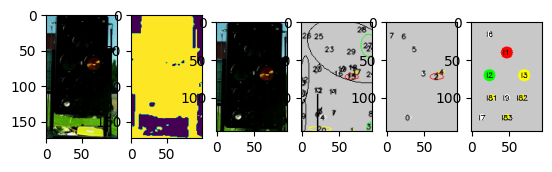

AssertionError: 

In [29]:
 test('../data/drohne-signals/traffic_light0011.png','../models/signals/kshauptsignal3.json','Ks 2+Vwh');

image ../data/drohne-signals/traffic_light0012.png
model ../models/signals/kshauptsignal3.json
crop [(255, 98), (0, 2)] [(255, 153), (0, 11), (255, 13), (0, 4), (255, 11)]
boxes [(0, 97, 0, 152), (0, 97, 164, 176), (0, 97, 181, 191)]
crop (0, 97, 0, 152)
ratio 1.5670103092783505
found 21 signalLigths
 (18.524892807006836, 149.72940063476562) 28.758089065551758 [('black', 0.6195652173913044), ('yellow', 0.3804347826086957)]
 (29.840044021606445, 138.9906463623047) 5.269129753112793 [('white', 0.5384615384615385), ('black', 0.46153846153846156)]
 (44.461585998535156, 131.96127319335938) 4.897583961486816 [('black', 1.0)]
 (23.5, 131.5) 27.477251052856445 [('black', 0.9999999999999999)]
 (93.26396179199219, 138.09141540527344) 22.92751121520996 [('black', 0.857142857142857), ('green', 0.12698412698412698), ('yellow', 0.015873015873015872)]
 (25.5123291015625, 101.91746520996094) 5.308989524841309 [('black', 1.0)]
 (95.5, 104.08333587646484) 1.0 [('black', 1.0)]
 (4.846405029296875, 112.59

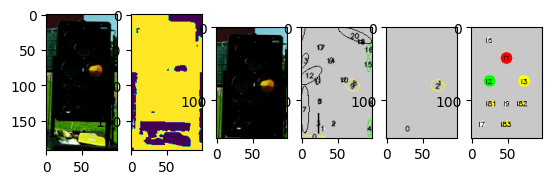

AssertionError: 

In [30]:
 test('../data/drohne-signals/traffic_light0012.png','../models/signals/kshauptsignal3.json','Ks 2+Vwh');

image ../data/drohne-signals/traffic_light0013.png
model ../models/signals/kshauptsignal3.json
crop [(255, 95), (0, 5)] [(255, 149), (0, 11), (255, 12), (0, 5), (255, 12)]
boxes [(0, 94, 0, 148), (0, 94, 160, 171), (0, 94, 177, 188)]
crop (0, 94, 0, 148)
ratio 1.574468085106383
found 23 signalLigths
 (25.74091911315918, 145.73968505859375) 31.480886459350586 [('black', 0.7102803738317757), ('yellow', 0.2897196261682243)]
 (23.521835327148438, 127.87425994873047) 5.095506191253662 [('black', 0.9999999999999999)]
 (91.6570816040039, 134.2886199951172) 20.357887268066406 [('black', 0.75), ('yellow', 0.171875), ('green', 0.078125)]
 (88.81172180175781, 136.85690307617188) 25.291410446166992 [('black', 0.951923076923077), ('green', 0.04807692307692308)]
 (29.060321807861328, 121.97875213623047) 2.845367193222046 [('black', 1.0)]
 (24.534971237182617, 99.000244140625) 4.94614839553833 [('black', 0.9999999999999999)]
 (1.731695294380188, 110.00228881835938) 61.81998825073242 [('black', 1.0)]


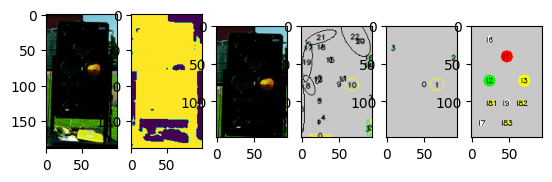

AssertionError: 

In [31]:
 test('../data/drohne-signals/traffic_light0013.png','../models/signals/kshauptsignal3.json','Ks 2+Vwh');

In [32]:
 test('../data/drohne-signals/traffic_light0014.png','../models/signals/kshauptsignal3.json','Ks 2+Vwh');

image ../data/drohne-signals/traffic_light0014.png
model ../models/signals/kshauptsignal3.json
crop [(255, 92), (0, 8)] [(255, 149), (0, 11), (255, 12), (0, 5), (255, 8)]
boxes [(0, 91, 0, 148), (0, 91, 160, 171), (0, 91, 177, 184)]
crop (0, 91, 0, 148)
ratio 1.6263736263736264
found 35 signalLigths
 (28.07525062561035, 146.11648559570312) 37.62432098388672 [('black', 0.6310679611650486), ('yellow', 0.3689320388349514)]
 (26.190345764160156, 134.96400451660156) 6.915847301483154 [('black', 0.8095238095238095), ('white', 0.19047619047619047)]
 (0.5, 140.5294189453125) 1.0 [('black', 1.0)]
 (41.0, 126.5) 4.886355400085449 [('black', 1.0)]
 (20.852691650390625, 127.76667022705078) 5.154516220092773 [('black', 0.9999999999999999)]
 (88.07782745361328, 134.38507080078125) 16.655155181884766 [('black', 0.5573770491803278), ('yellow', 0.4426229508196721)]
 (84.3263931274414, 130.74542236328125) 37.525413513183594 [('black', 1.0)]
 (89.14583587646484, 122.0) 3.2172305583953857 [('black', 1.0)]

AssertionError: 

In [21]:
 test('../data/drohne-signals/traffic_light0016.png','../models/signals/kshauptsignal3.json','Ks 2+Vwh');

image ../data/drohne-signals/traffic_light0016.png
model ../models/signals/kshauptsignal3.json
crop (9, 93, 10, 150)
140 84 3
ratio 1.6666666666666667
found 19 signalLigths
 (36.575191497802734, 120.65148162841797) 4.510437488555908 [('black', 1.0)]
 (16.525943756103516, 120.90973663330078) 4.799472332000732 [('black', 1.0)]
 (81.55310821533203, 126.1529769897461) 37.672462463378906 [('black', 0.9745762711864406), ('yellow', 0.025423728813559324)]
 (37.0, 90.14583587646484) 3.2172305583953857 [('black', 0.9999999999999998)]
 (18.060321807861328, 88.97875213623047) 2.845367193222046 [('black', 1.0)]
 (13.999553680419922, 89.00044250488281) 0.14548026025295258 [('black', 1.0)]
 (60.611785888671875, 68.03986358642578) 16.62041664123535 [('black', 0.6822429906542056), ('yellow', 0.1822429906542056), ('red', 0.13551401869158877)]
 (48.90166473388672, 60.51750946044922) 4.977295398712158 [('black', 1.0)]
 (0.5, 63.599998474121094) 1.0 [('black', 1.0)]
 (14.59645938873291, 60.98799514770508) 

AssertionError: 

In [23]:
 test('../data/drohne-signals/traffic_light0026.png','../models/signals/kshauptsignal3.json','Hp 0+Zs 7');

image ../data/drohne-signals/traffic_light0026.png
model ../models/signals/kshauptsignal3.json
crop (10, 76, 0, 116)
116 66 3
ratio 1.7575757575757576
found 11 signalLigths
 (29.400585174560547, 100.97660827636719) 3.259974241256714 [('black', 1.0)]
 (14.485843658447266, 99.74510955810547) 5.781462669372559 [('black', 0.9333333333333332), ('white', 0.06666666666666667)]
 (50.51178741455078, 81.3402328491211) 7.970577716827393 [('yellow', 0.7380952380952381), ('black', 0.14285714285714285), ('red', 0.11904761904761904)]
 (18.05018424987793, 80.23798370361328) 8.294425964355469 [('yellow', 0.7142857142857143), ('black', 0.2857142857142857)]
 (13.87863540649414, 75.21589660644531) 4.351416110992432 [('black', 1.0)]
 (0.5, 79.52777862548828) 1.0 [('black', 1.0)]
 (39.525943756103516, 52.90973663330078) 4.799471855163574 [('black', 0.9999999999999998)]
 (35.379005432128906, 35.139739990234375) 15.650045394897461 [('red', 0.9119170984455959), ('yellow', 0.08808290155440414)]
 (36.23424911499

AssertionError: 

In [8]:
 test('../data/drohne-signals/traffic_light0034.png','../models/signals/kshauptsignal3.json','Ks 2+Vwh');

image ../data/drohne-signals/traffic_light0034.png
model ../models/signals/kshauptsignal3.json
crop (0, 99, 0, 155)
155 99 3
ratio 1.5656565656565657
found 31 signalLigths
 (78.66666412353516, 153.5) 1.0 [('black', 1.0)]
 (18.272708892822266, 162.68798828125) 42.45435333251953 [('black', 1.0)]
 (39.80768966674805, 150.11965942382812) 5.063967227935791 [('black', 1.0)]
 (21.54467010498047, 151.30886840820312) 15.764223098754883 [('yellow', 0.6263736263736264), ('black', 0.37362637362637363)]
 (7.5179619789123535, 150.44570922851562) 10.011332511901855 [('yellow', 0.765625), ('black', 0.234375)]
 (94.8189697265625, 150.14288330078125) 7.342038154602051 [('black', 0.9210526315789475), ('green', 0.07894736842105263)]
 (96.31745147705078, 139.94419860839844) 6.150685787200928 [('black', 1.0)]
 (95.73236846923828, 131.35861206054688) 4.188450813293457 [('black', 1.0)]
 (91.0333251953125, 139.40863037109375) 41.314327239990234 [('black', 1.0)]
 (24.68453025817871, 133.7552947998047) 8.9130363

check lamp l9 xyd 0.50039529638583 rd 0.8432078537396621 cd 1.0 match False False False
check_light 0.9669936209013967 1.3268546672782513 0.020202020202020204 [('black', 1.0)]
check lamp l1 xyd 0.9496165977711347 rd 1.6814664692236134 cd 1.0 match False False False
check lamp l2 xyd 0.8363725686938952 rd 1.6814664692236134 cd 1.0 match False False False
check lamp l3 xyd 0.5012037485876215 rd 1.6814664692236134 cd 1.0 match False False False
check lamp l6 xyd 1.3218185684187076 rd 1.1953903718510246 cd 1.0 match False False False
check lamp l7 xyd 0.8496089234250721 rd 1.1953903718510246 cd 1.0 match False False False
check lamp l81 xyd 0.6813420599255815 rd 1.1953903718510246 cd 1.0 match False False False
check lamp l82 xyd 0.2682393726999479 rd 1.1953903718510246 cd 1.0 match False False False
check lamp l83 xyd 0.5219576497499891 rd 1.1953903718510246 cd 1.0 match False False False
check lamp l9 xyd 0.47327548198173985 rd 1.1953903718510246 cd 1.0 match False False False
check_ligh

check lamp l3 xyd 0.6079818613420106 rd 0.7272239597842887 cd 0.9999999999999999 match False False False
check lamp l6 xyd 0.48203903243598434 rd 0.24114786241169975 cd 0.9999999999999999 match False True False
check lamp l7 xyd 0.8775497847240192 rd 0.24114786241169975 cd 0.9999999999999999 match False True False
check lamp l81 xyd 0.5810352401233688 rd 0.24114786241169975 cd 0.9999999999999999 match False True False
check lamp l82 xyd 0.7867859970250751 rd 0.24114786241169975 cd 0.9999999999999999 match False True False
check lamp l83 xyd 0.9392118169208546 rd 0.24114786241169975 cd 0.9999999999999999 match False True False
check lamp l9 xyd 0.6589514987387017 rd 0.24114786241169975 cd 0.9999999999999999 match False True False
check_light 0.3505818916089607 0.40582626034515074 0.04040404040404041 [('black', 1.0)]
check lamp l1 xyd 0.17661954692427365 rd 1.0794064778956511 cd 1.0 match True False False
check lamp l2 xyd 0.4827481895002013 rd 1.0794064778956511 cd 1.0 match False False

AssertionError: 

In [ ]:
 test('../data/drohne-signals/traffic_light0037.png','../models/signals/kshauptsignal3.json','Ks 2+Vwh');